In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [142]:
df = pd.read_csv("allregoion.csv")

In [143]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Title,Rating,Price,region,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre
0,0,0,"Radisson Blu Hotel, Jeddah Al Salam",8.7,540,Jeddah,0,0,0,0,0,0,0,1,0
1,1,1,Holiday Inn JEDDAH GATEWAY,8.4,614,Jeddah,0,0,0,0,0,0,0,1,0


In [144]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]


,Unnamed: 0.1,Unnamed: 0,Title,Rating,Price,region,Airport Shuttle,Business Centre,Facilities for Disabled,Fitness Centre,Restaurant,Room Service,Spa,Swimming Pool,Wellness Centre


In [145]:
# Completeness
df.isnull().sum()


Unnamed: 0.1               0
Unnamed: 0                 0
Title                      0
Rating                     0
Price                      0
region                     0
Airport Shuttle            0
Business Centre            0
Facilities for Disabled    0
Fitness Centre             0
Restaurant                 0
Room Service               0
Spa                        0
Swimming Pool              0
Wellness Centre            0
dtype: int64

In [146]:
# Accurecy types
df.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                   int64
Title                       object
Rating                     float64
Price                       object
region                      object
Airport Shuttle              int64
Business Centre              int64
Facilities for Disabled      int64
Fitness Centre               int64
Restaurant                   int64
Room Service                 int64
Spa                          int64
Swimming Pool                int64
Wellness Centre              int64
dtype: object

In [147]:
# Remove commas and convert 'Price' column to integer
df['Price'] = df['Price'].str.replace(',', '').astype(int)

In [148]:
df = df[['Price', 'Rating']]

In [149]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

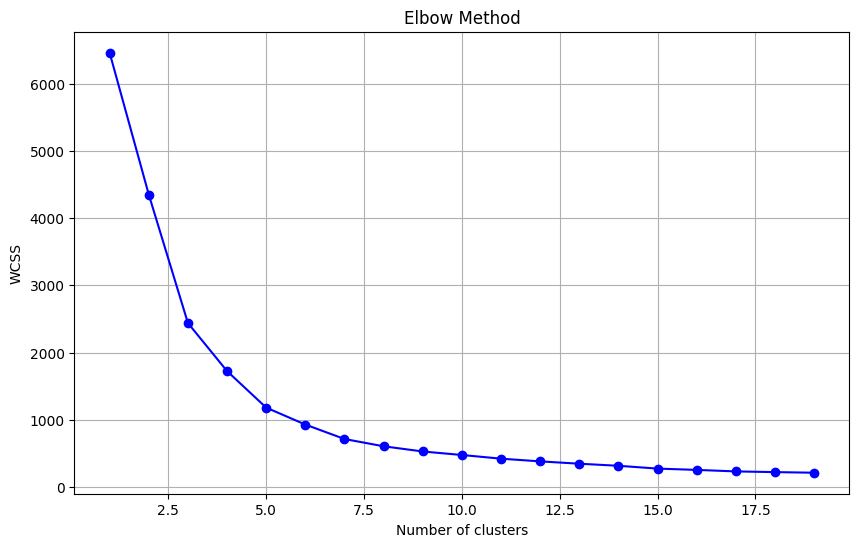

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [152]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 4 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [153]:
# Fit the model on the training data
y_pred = model.fit_predict(X_scaled)

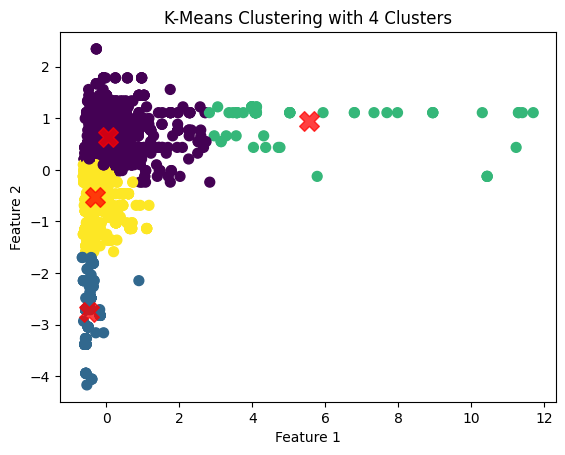

In [154]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [155]:
X['kmeans'] = y_pred

In [156]:
X['kmeans'].value_counts()

kmeans
0    1772
3    1196
1     199
2      63
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Rating'>

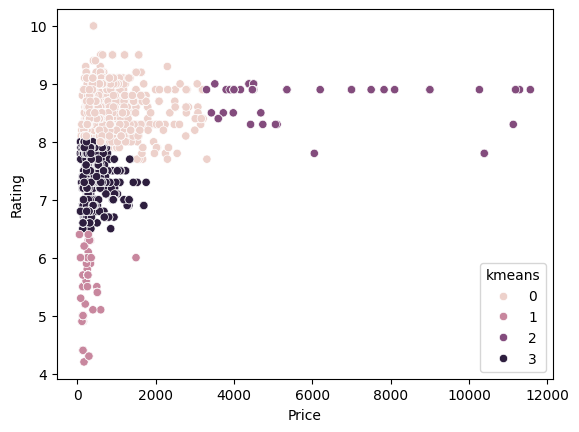

In [157]:
sns.scatterplot(data = X , x = 'Price', y = 'Rating', hue = 'kmeans')


In [158]:
kmeans = KMeans(n_clusters=3)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(features)

# Verify the DataFrame
print(df.head())

   Price  Rating  kmeans  Cluster
0    540     8.7       0        0
1    614     8.4       0        0
2    193     8.2       0        0
3    375     7.4       3        0
4    472     8.1       0        0


In [159]:
from sklearn.cluster import KMeans

# Create features DataFrame
features = df[['Price', 'Rating']]

# Perform clustering
kmeans = KMeans(n_clusters=4)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(features)

# Verify the DataFrame
print(df.head())


   Price  Rating  kmeans  Cluster
0    540     8.7       0        2
1    614     8.4       0        2
2    193     8.2       0        2
3    375     7.4       3        2
4    472     8.1       0        2


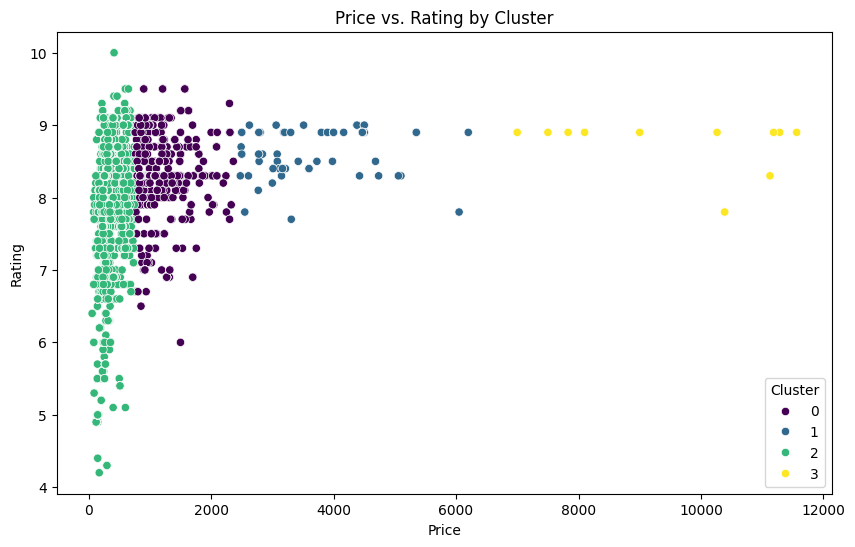

In [160]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=df, palette='viridis')
plt.title('Price vs. Rating by Cluster')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()

Text(0, 0.5, 'Rating')

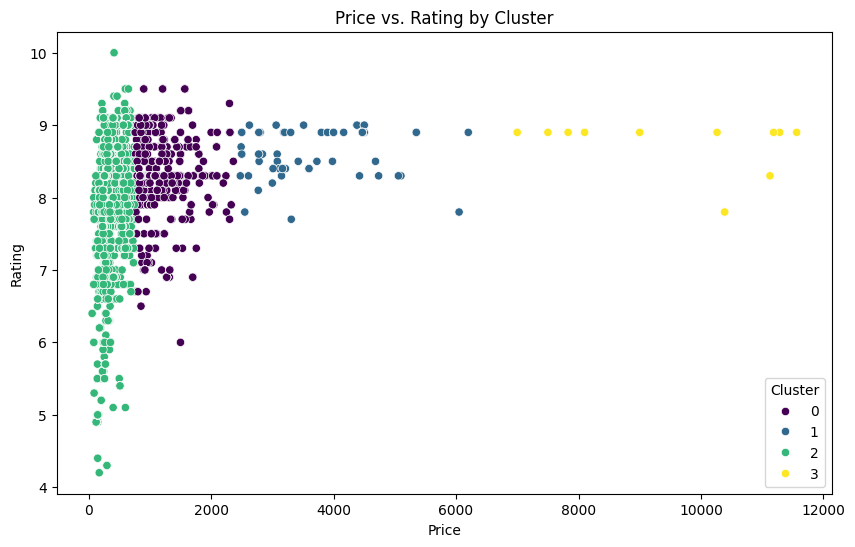

In [161]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=df, palette='viridis')
plt.title('Price vs. Rating by Cluster')
plt.xlabel('Price')
plt.ylabel('Rating')

Text(0.5, 1.0, 'Rating Distribution by Cluster')

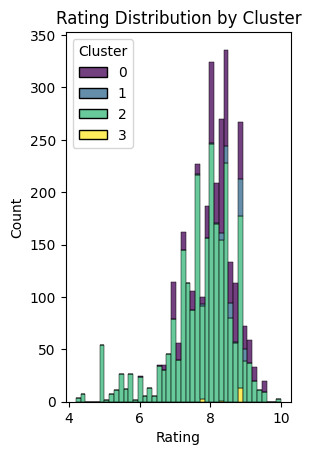

In [162]:
# Histogram for Rating
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Rating', hue='Cluster', palette='viridis', multiple='stack')
plt.title('Rating Distribution by Cluster')

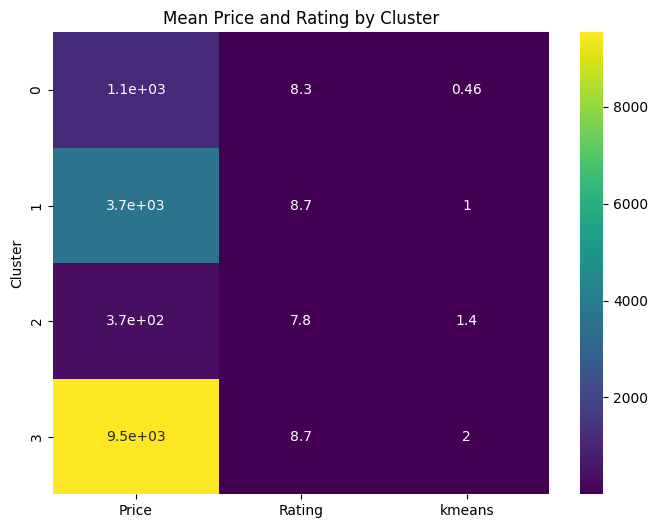

In [163]:
# Calculate mean values for each cluster
cluster_means = df.groupby('Cluster').mean()

plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Mean Price and Rating by Cluster')
plt.show()

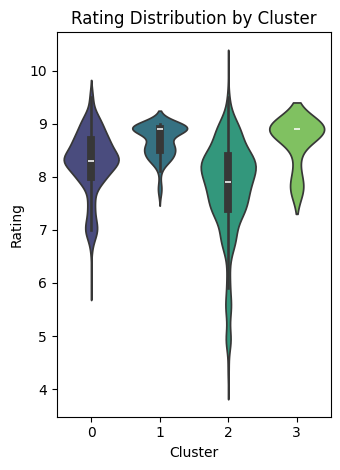

In [164]:
# Violin plot for Rating
plt.subplot(1, 2, 2)
sns.violinplot(x='Cluster', y='Rating', data=df, palette='viridis')
plt.title('Rating Distribution by Cluster')

plt.tight_layout()
plt.show()

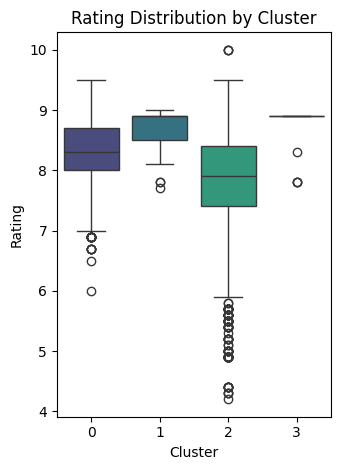

In [165]:
# Box plot for Rating
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Rating', data=df, palette='viridis')
plt.title('Rating Distribution by Cluster')

plt.tight_layout()
plt.show()

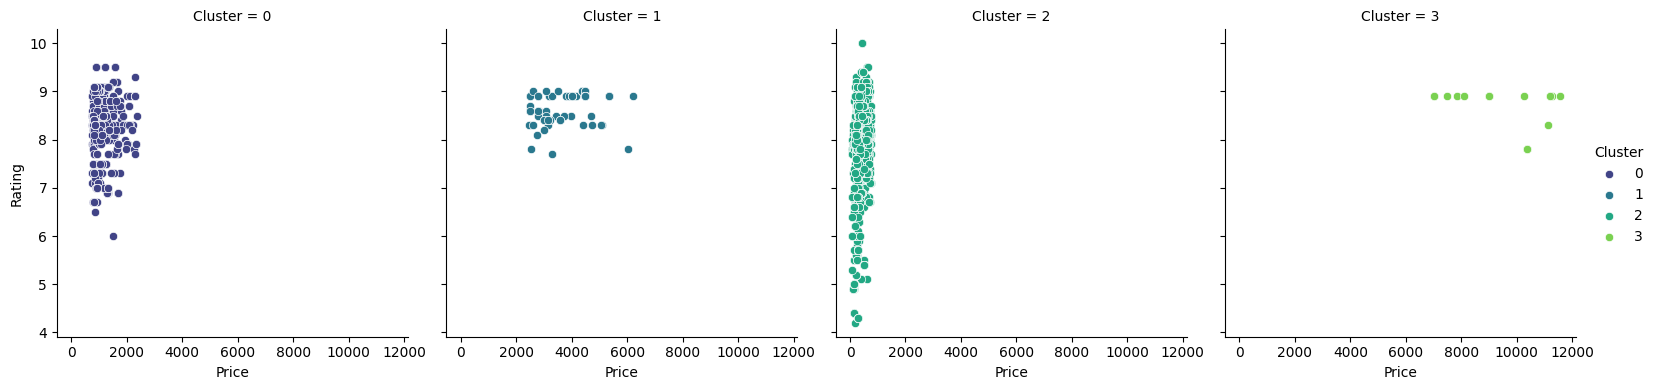

In [167]:
g = sns.FacetGrid(df, col='Cluster', hue='Cluster', palette='viridis', height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x='Price', y='Rating')
g.add_legend()
g.set_axis_labels('Price', 'Rating')
plt.show()

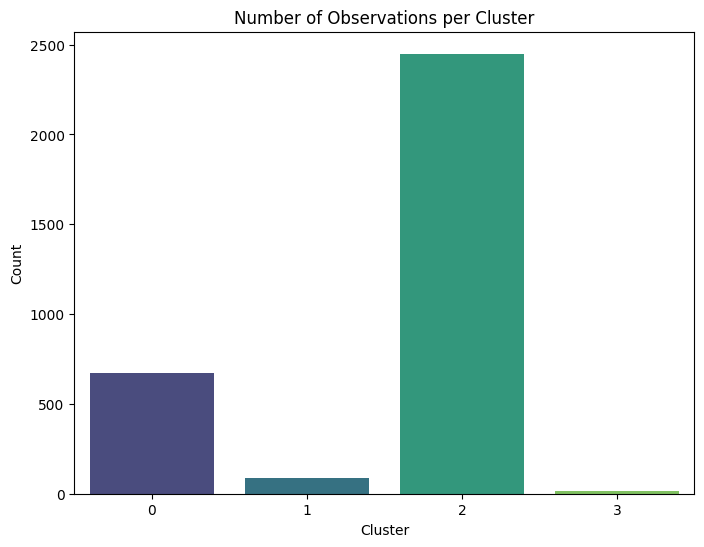

In [168]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

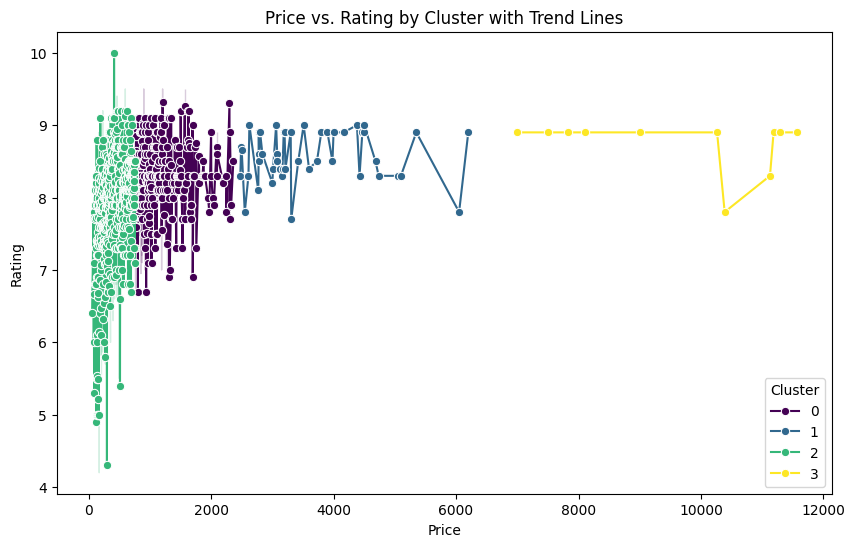

In [169]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Price', y='Rating', hue='Cluster', data=df, palette='viridis', marker='o')
plt.title('Price vs. Rating by Cluster with Trend Lines')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

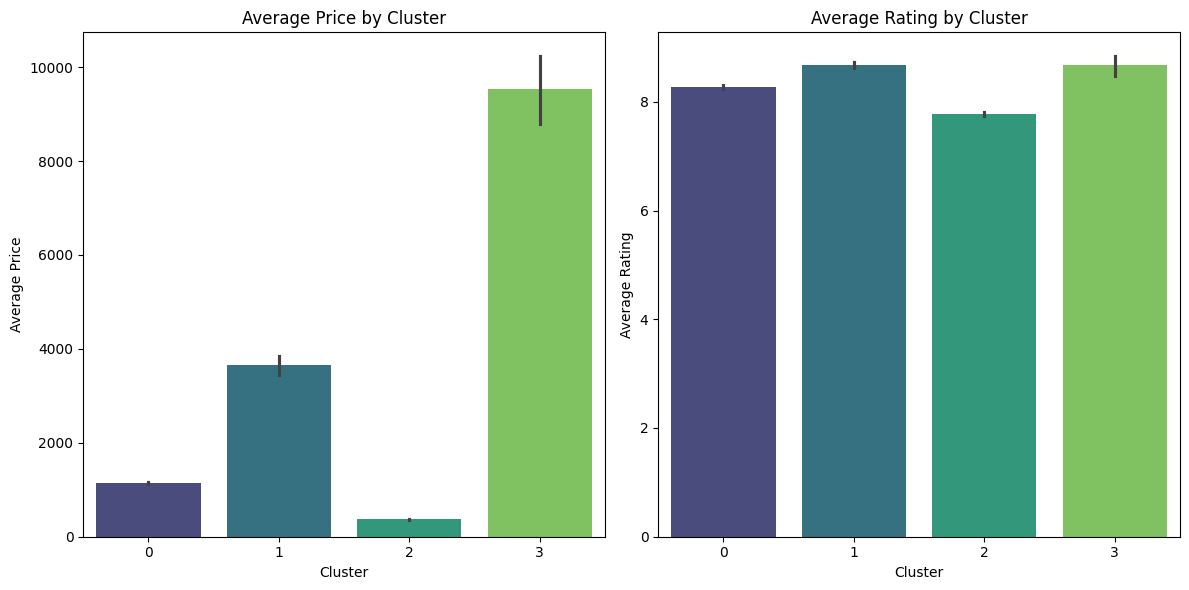

In [170]:
plt.figure(figsize=(12, 6))

# Bar plot for Price
plt.subplot(1, 2, 1)
sns.barplot(x='Cluster', y='Price', data=df, palette='viridis', estimator='mean')
plt.title('Average Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Price')

# Bar plot for Rating
plt.subplot(1, 2, 2)
sns.barplot(x='Cluster', y='Rating', data=df, palette='viridis', estimator='mean')
plt.title('Average Rating by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


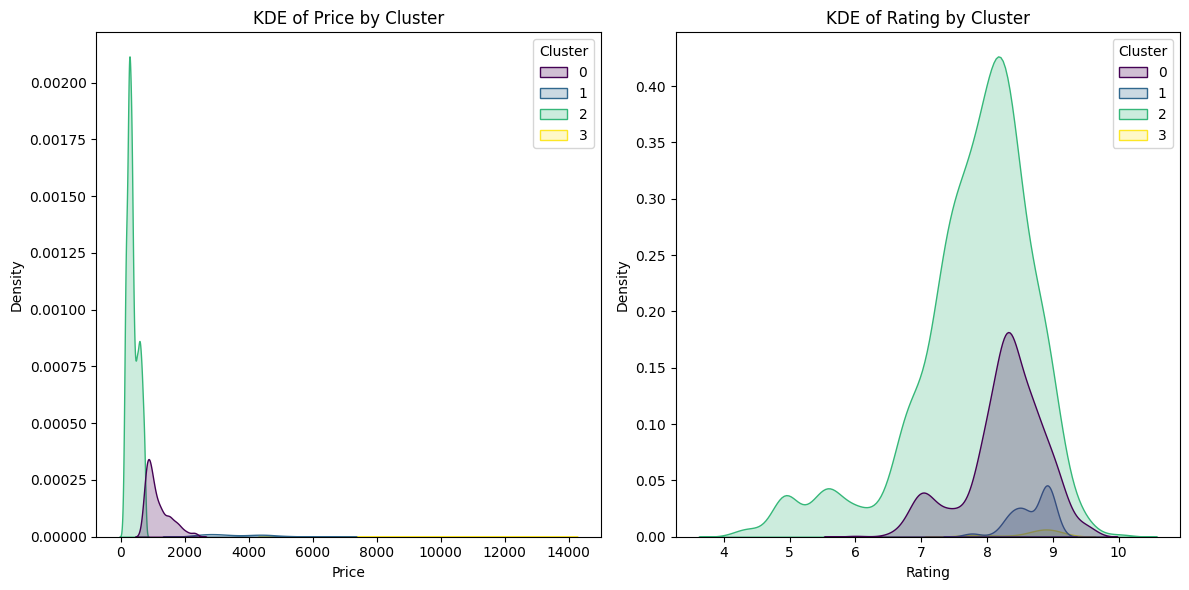

In [171]:
plt.figure(figsize=(12, 6))

# KDE plot for Price
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Price', hue='Cluster', palette='viridis', fill=True)
plt.title('KDE of Price by Cluster')

# KDE plot for Rating
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Rating', hue='Cluster', palette='viridis', fill=True)
plt.title('KDE of Rating by Cluster')

plt.tight_layout()
plt.show()

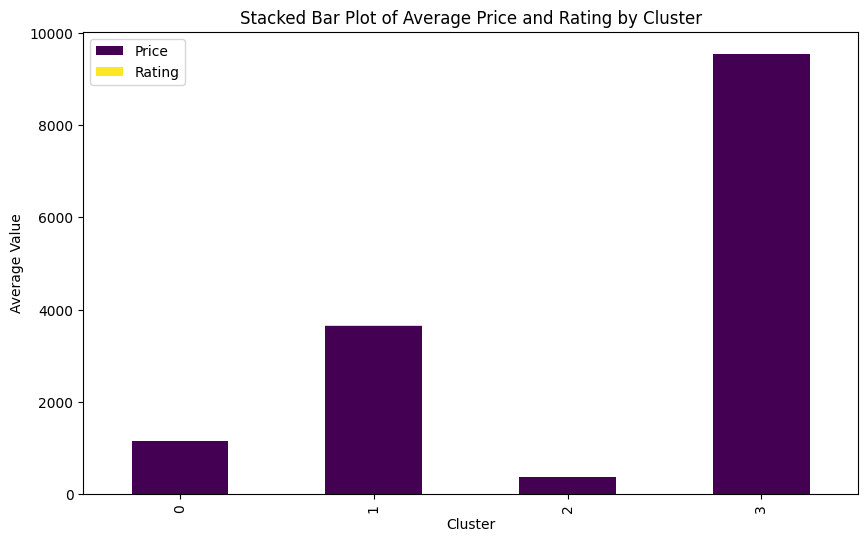

In [172]:
# Create a pivot table for stacked bar plot
pivot_df = df.pivot_table(index='Cluster', values=['Price', 'Rating'], aggfunc='mean')

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Plot of Average Price and Rating by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.show()